## Imports:

In [1]:
from pyrocko import gf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates  as pdt
import os.path as os

### Let's start with defining store we will use. This store contains green functions solutions for specific region.

In [2]:
store_id = 'gfs_ismetpasa'
if not os.exists(store_id):
    gf.ws.download_gf_store(site='kinherd', store_id=store_id)

In [3]:
# Setup the LocalEngine and point it to the fomosto store you just downloaded.
# *store_superdirs* is a list of directories where to look for GF Stores.
engine = gf.LocalEngine(store_superdirs=['.'])

In [4]:
km = 1e3  # for convenience

### Now, I am going to define an Earthquake source. 

Earthquake source dynamics provides key elements for the prediction of ground motion, and to understand the physics of earthquake initiation, and pro- pagation.


In the early 1950s it was recognized that P waves radiated by earthquakes presented a spatial distribu- tion similar to that produced by single couples of forces, but it was very soon recognized that this type of source could not explain S wave radiation (Honda, 1962). The next level of complexity was to introduce a double couple source, a source without resultant force or moment. The physical origin of the double couple model was established in the early 1960s, thanks to the observational work of numerous seismologists and the crucial theoretical breakthrough of Maruyama (1963) and Burridge and Knopoff (1964), who proved that a fault in an
elastic model was equivalent to a double couple source.

The point source model provides a simple approach to the simulation of seismic radiation. Haskell (1964, 1966) provided a very simple solution for the **far field of a rectangular fault**. Haskell’s model became the de facto earthquake fault model in the late 1960s and early 1970s and was used to model many earthquakes.

The most widely used models for interpreting seismic radiation are the so-called dislocation models. In these models the earthquake is simulated as the kinematic spread- ing of a displacement discontinuity (slip or dislocation in seismological usage) along a fault plane. As long as the thickness of the fault zone h is negligible with respect to the other length scales of the fault (width W and length L), the fault may be idealized as a surface of displacement discontinuity or slip.

In a Haskell model, a uniform displacement discontinuity spreads at constant rupture velocity inside a rectangular-shaped fault. At low frequencies, or wavelengths much longer than the size of the fault, this model is a reasonable approximation to a simple seismic rupture propagating along a strike slip fault.

In Haskell’s model at time t 1⁄4 0 a line of disloca- tion of width W appears suddenly and propagates along the fault length at a constant rupture velocity until a region of length L of the fault has been broken. As the dislocation moves it leaves behind a zone of constant slip D.

https://booksite.elsevier.com/brochures/geophysics/PDFs/00061.pdf

In [5]:
rect_source_base = gf.RectangularSource(
    lat=0., lon=0., #merkezden başlıyor, center based, 
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=0., strike=104.,
    slip=0.015)

In [6]:
# We will define a grid of targets
# number in east and north directions, and total
ngrid = 80

In [7]:
# extension from origin in all directions
size = 20.*km
ntargets = ngrid**2

In [8]:
# make regular line vector
norths = np.linspace(-size, size, ngrid)
easts = np.linspace(-size, size, ngrid)

In [9]:
norths

array([-20000.        , -19493.67088608, -18987.34177215, -18481.01265823,
       -17974.6835443 , -17468.35443038, -16962.02531646, -16455.69620253,
       -15949.36708861, -15443.03797468, -14936.70886076, -14430.37974684,
       -13924.05063291, -13417.72151899, -12911.39240506, -12405.06329114,
       -11898.73417722, -11392.40506329, -10886.07594937, -10379.74683544,
        -9873.41772152,  -9367.08860759,  -8860.75949367,  -8354.43037975,
        -7848.10126582,  -7341.7721519 ,  -6835.44303797,  -6329.11392405,
        -5822.78481013,  -5316.4556962 ,  -4810.12658228,  -4303.79746835,
        -3797.46835443,  -3291.13924051,  -2784.81012658,  -2278.48101266,
        -1772.15189873,  -1265.82278481,   -759.49367089,   -253.16455696,
          253.16455696,    759.49367089,   1265.82278481,   1772.15189873,
         2278.48101266,   2784.81012658,   3291.13924051,   3797.46835443,
         4303.79746835,   4810.12658228,   5316.4556962 ,   5822.78481013,
         6329.11392405,  

In [10]:
# make regular grid
norths2d = np.repeat(norths, len(easts))
easts2d = np.tile(easts, len(norths))

### Now, I am going to define a Satellite_target

In [11]:
# We initialize the satellite target and set the line of sight vectors
# direction, example of the Envisat satellite
look = 23.     # angle between the LOS and the vertical
heading = -166  # angle between the azimuth and the east (anti-clock)
theta = np.empty(ntargets)  # vertical LOS from horizontal, look angle
theta.fill(np.deg2rad((90. - look)))
phi = np.empty(ntargets)  # horizontal LOS from E in anti-clokwise rotation #heading, 
phi.fill(np.deg2rad(-90-heading))

In [12]:
satellite_target_base = gf.SatelliteTarget(
    north_shifts=norths2d,
    east_shifts=easts2d,
    tsnapshot=24. * 3600.,  # time of the desired snapshot in [s],
    interpolation='nearest_neighbor', # Interpolation method between Green’s functions.
    phi=phi,
    theta=theta,
    store_id=store_id)

In [13]:
# The computation is performed by calling process on the engine
result_base = engine.process(rect_source_base, [satellite_target_base])

In [14]:
result_base.results_list
# theta,phi 

[[<pyrocko.gf.meta.SatelliteResult at 0x12cc8fdc0>]]

In [15]:
result_base.results_list[0] #theta

In [16]:
result_base.results_list[0][0].result

{'displacement.n': array([ 0.00012021,  0.00012335,  0.00012705, ..., -0.00012705,
        -0.00012335, -0.00012021], dtype=float32),
 'displacement.e': array([ 0.00014026,  0.00014199,  0.00014359, ..., -0.00014359,
        -0.00014199, -0.00014026], dtype=float32),
 'displacement.d': array([-3.6221777e-06, -3.1528803e-06, -2.5061822e-06, ...,
        -2.5061845e-06, -3.1528809e-06, -3.6221784e-06], dtype=float32),
 'displacement.los': array([ 6.21684860e-05,  6.30880385e-05,  6.40459849e-05, ...,
        -5.94320784e-05, -5.72835602e-05, -5.55000211e-05])}

In [17]:
result_base.results_list[0][0].result.keys()

dict_keys(['displacement.n', 'displacement.e', 'displacement.d', 'displacement.los'])

In [18]:
result_base.results_list[0][0].result['displacement.n']

array([ 0.00012021,  0.00012335,  0.00012705, ..., -0.00012705,
       -0.00012335, -0.00012021], dtype=float32)

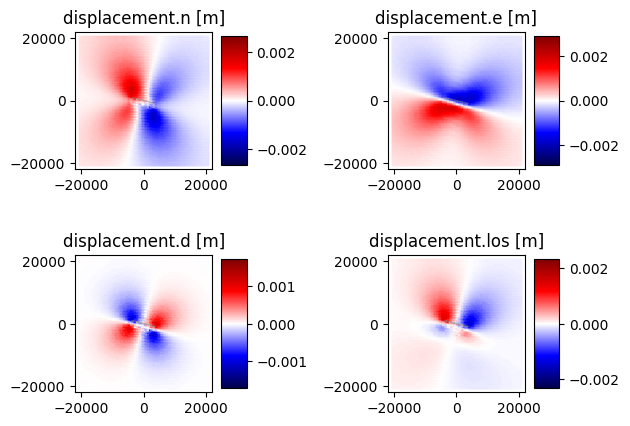

In [19]:
def plot_static_los_result(result, target=0, rect_source = None):
    '''Helper function for plotting the displacement'''

    import matplotlib.pyplot as plt

    # get target coordinates and displacements from results
    N = result.request.targets[target].coords5[:, 2]
    E = result.request.targets[target].coords5[:, 3]
    synth_disp = result.results_list[0][target].result
    

    # get the component names of displacements
    components = synth_disp.keys() #'displacement.n', 'displacement.e', 'displacement.d', 'displacement.los'
    fig, _ = plt.subplots(int(len(components)/2), int(len(components)/2))

    #aralıkları çıkartıyoruz.
    vranges = [(synth_disp[k].max(),
                synth_disp[k].min()) for k in components]

    for comp, ax, vrange in zip(components, fig.axes, vranges):

        lmax = np.abs([np.min(vrange), np.max(vrange)]).max()

        # plot displacements at targets as colored points
        cmap = ax.scatter(E, N, c=synth_disp[comp], s=10., marker='s',
                          edgecolor='face', cmap='seismic',
                          vmin=-1.5*lmax, vmax=1.5*lmax)

        ax.set_title(comp+' [m]')
        ax.set_aspect('equal')
        # We plot the modeled fault
        n, e = rect_source.outline(cs='xy').T
        ax.fill(e, n, color=(0.5, 0.5, 0.5), alpha=0.5)

        fig.colorbar(cmap, ax=ax, aspect=5)
        fig.tight_layout()

    plt.show()


plot_static_los_result(result_base, rect_source = rect_source_base)

### Now lets look at what happens when we change look angle;

#### First  we will look for the range Tohis suggested to us;

[ 8.50467169e-05  8.65370431e-05  8.81597266e-05 ... -8.39560040e-05
 -8.12485944e-05 -7.89710886e-05]


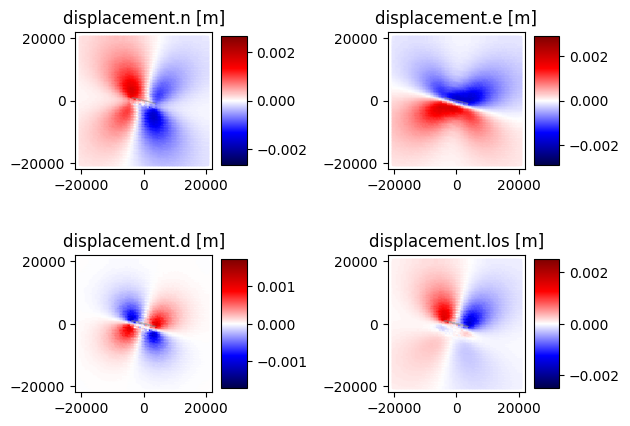

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 9.35109646e-05  9.52178515e-05  9.70937117e-05 ... -9.30906598e-05
 -9.01818552e-05 -8.77253646e-05]


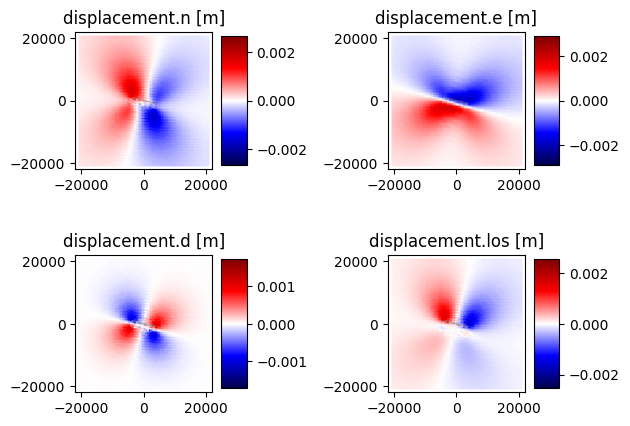

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 1.01519636e-04  1.03434768e-04  1.05554666e-04 ... -1.01771787e-04
 -9.86757591e-05 -9.60522514e-05]


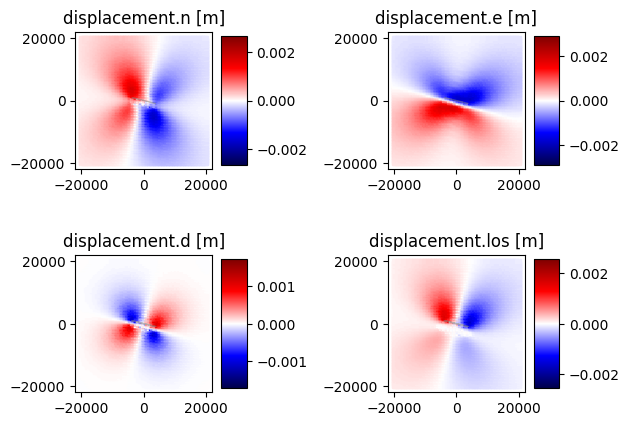

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 0.00010903  0.00011115  0.0001135  ... -0.00010996 -0.00010669
 -0.00010391]


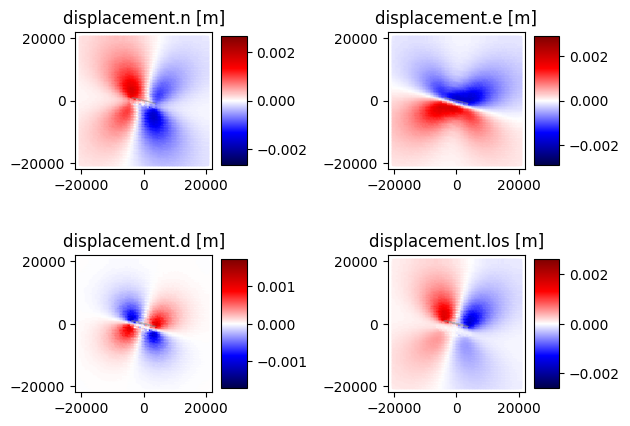

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 0.00011602  0.00011832  0.0001209  ... -0.00011761 -0.00011418
 -0.00011126]


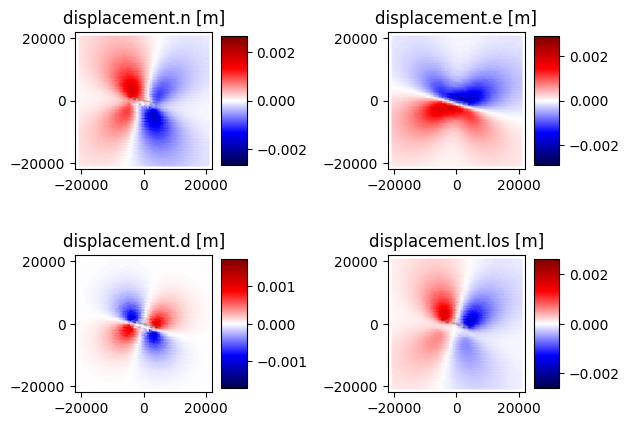

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 0.00012243  0.00012491  0.0001277  ... -0.00012468 -0.00012112
 -0.00011807]


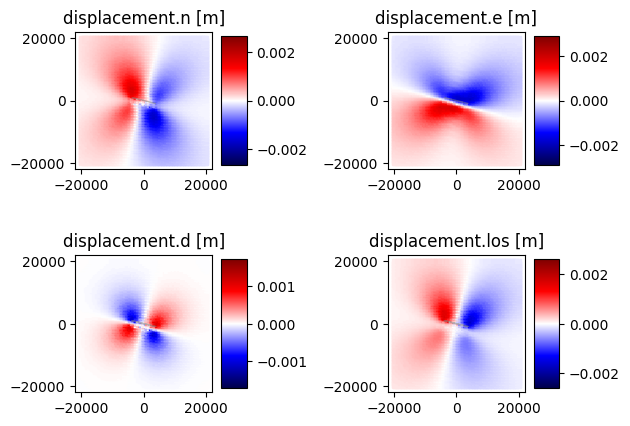

***************************************************************************************
***************************************************************************************
***************************************************************************************


In [20]:
looks = [33,37,41,45,49,53]

for i in range(len(looks)):
    theta_ = np.empty(ntargets)
    theta_.fill(np.deg2rad((90. - looks[i])))
    
    s_t = gf.SatelliteTarget( north_shifts=norths2d, east_shifts=easts2d, tsnapshot=24. * 3600.,
                             interpolation='nearest_neighbor', phi=phi, theta=theta_ , store_id=store_id)
    
    res = engine.process(rect_source_base, [s_t])
    print(res.results_list[0][0].result['displacement.los'])
    plot_static_los_result(res, rect_source = rect_source_base)
    
    del theta_, s_t, res
    print("***************************************************************************************")
    print("***************************************************************************************")
    print("***************************************************************************************")

#### And here we will look angles from 0 to 90 with 10 degree stepsize

[ 2.97141849e-05  2.98526680e-05  2.99060813e-05 ... -2.49698643e-05
 -2.36427079e-05 -2.25798869e-05]


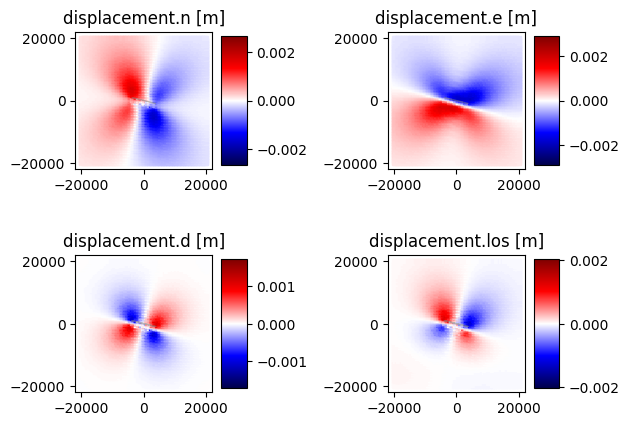

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 5.49033416e-05  5.56453975e-05  5.63972993e-05 ... -5.16872164e-05
 -4.97199251e-05 -4.80958736e-05]


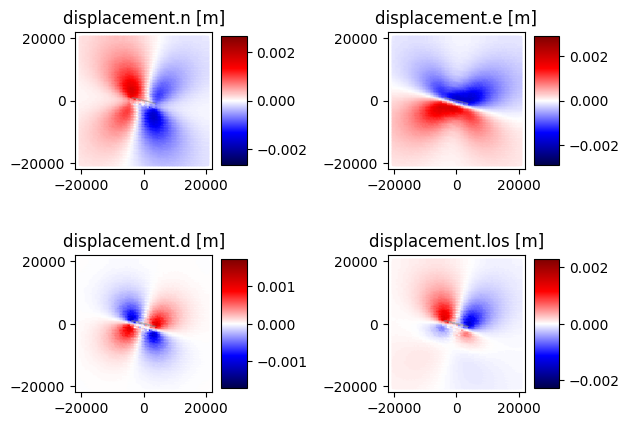

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 9.95623522e-05  1.01426259e-04  1.03486070e-04 ... -9.96463763e-05
 -9.65957744e-05 -9.40128535e-05]


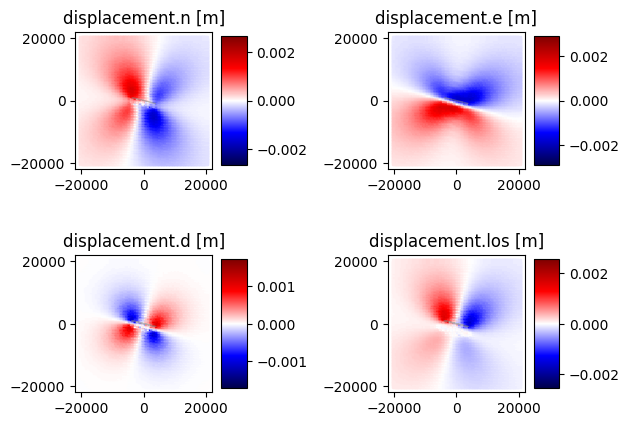

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 0.00011768  0.00012002  0.00012265 ... -0.00011943 -0.00011597
 -0.00011302]


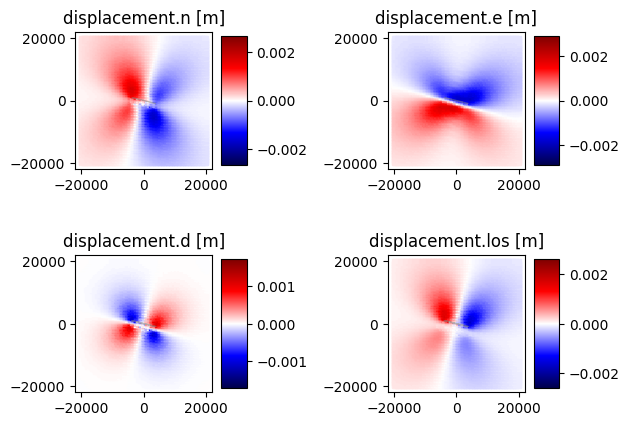

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 0.00013221  0.00013497  0.00013809 ... -0.00013559 -0.00013182
 -0.00012859]


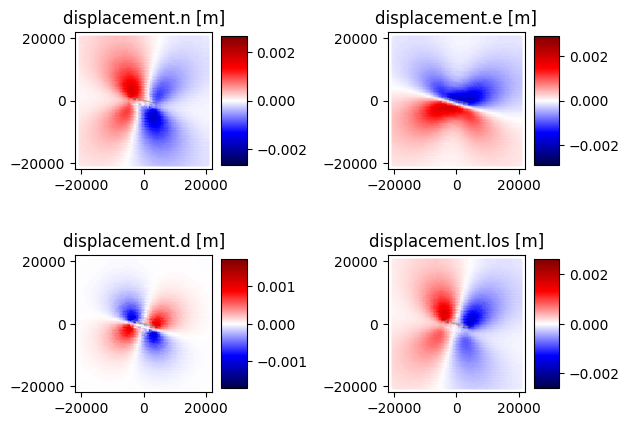

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 0.00014273  0.00014582  0.00014934 ... -0.00014762 -0.00014367
 -0.00014026]


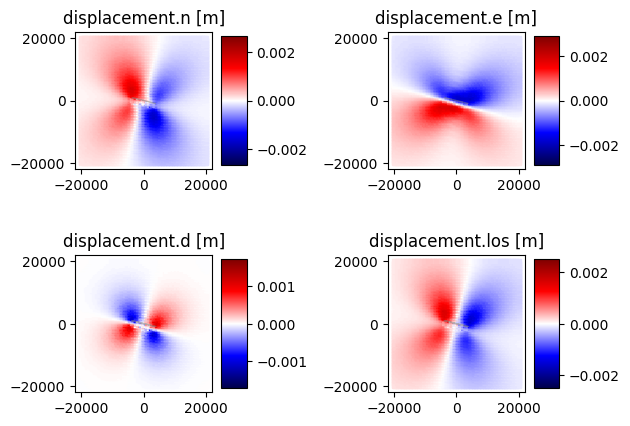

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 0.00014892  0.00015224  0.00015604 ... -0.00015517 -0.00015115
 -0.00014766]


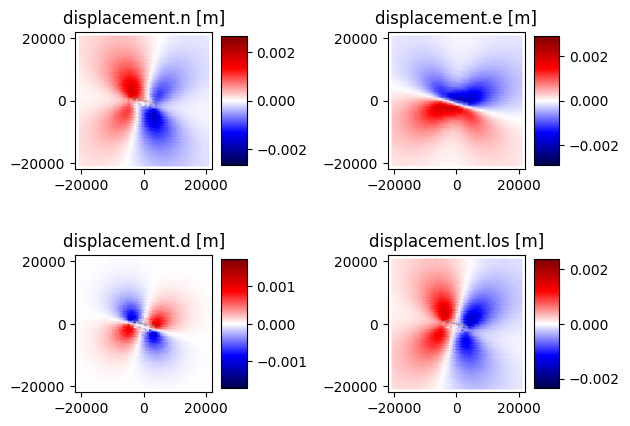

***************************************************************************************
***************************************************************************************
***************************************************************************************
[ 0.00015057  0.00015403  0.00015801 ... -0.00015801 -0.00015403
 -0.00015057]


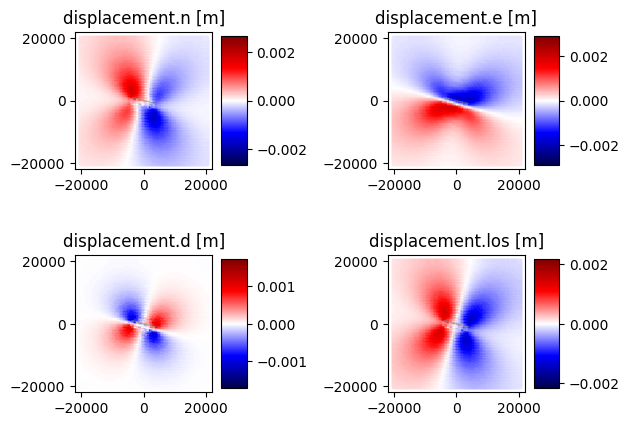

***************************************************************************************
***************************************************************************************
***************************************************************************************


In [21]:
looks = [10,20,40,50,60,70,80, 90]

for i in range(len(looks)):

    theta_ = np.empty(ntargets)  # vertical LOS from horizontal
    theta_.fill(np.deg2rad((90. - looks[i])))

    s_t = gf.SatelliteTarget( north_shifts=norths2d, east_shifts=easts2d, tsnapshot=24. * 3600.,
                             interpolation='nearest_neighbor', phi=phi, theta=theta_, store_id=store_id)
    
    res = engine.process(rect_source_base, [s_t])
    print(res.results_list[0][0].result['displacement.los'])
    
    plot_static_los_result(res, rect_source = rect_source_base)
    del theta_, s_t, res
    print("***************************************************************************************")
    print("***************************************************************************************")
    print("***************************************************************************************")

### Now letsplay with source a little bit.

#### First I am going to play with the parameters of Rectangular source:

#### Parameters of  Rectangular Source:
* **magnitude** float, moment magnitude Mw
* **strike** float, strike direction in [deg], measured clockwise from north
* **dip** float, dip angle in [deg], measured downward from horizontal
* **rake** float, rake angle in [deg], measured counter-clockwise from right-horizontal in on-plane view
* **length** float, length of rectangular source area [m]
* **width** float, width of rectangular source area [m]
* **anchor** str (pyrocko.guts.StringChoice), optional, default: 'center'. Anchor point for positioning the plane, can be: top, center bottom, top_left, top_right,bottom_left,bottom_right, center_left, center right.
* **nucleation_x** float, horizontal position of rupture nucleation in normalized fault plane coordinates (-1. = left edge, +1. = right edge)
* **nucleation_y** float,down-dip position of rupture nucleation in normalized fault plane coordinates (-1. = upper edge, +1. = lower edge)
* **velocity** float, default: 3500.0, speed of rupture front [m/s]
* **slip** float, Slip on the rectangular source area [m]
* **opening_fraction** float, Determines fraction of slip related to opening. (-1: pure tensile closing, 0: pure shear, 1: pure tensile opening)
* **decimation_factor** int, optional, default: 1 Sub-source decimation factor, a larger decimation will make the result inaccurate but shorten the necessary computation time (use for testing puposes only).
* **aggressive_oversampling** bool, default: False, Aggressive oversampling for basesource discretization. When using ‘multilinear’ interpolation oversampling has practically no effect.

#### 1- add magnitude:

In [22]:
rect_source_mag = gf.RectangularSource(magnitude = 7.8,
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=0., strike=104.,
    slip=0.015)

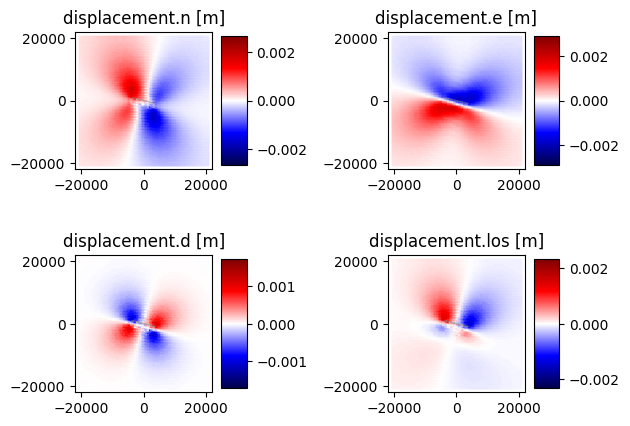

In [23]:
res_mag = engine.process(rect_source_mag, [satellite_target_base])
                         
plot_static_los_result(res_mag, rect_source = rect_source_mag)

del rect_source_mag, res_mag

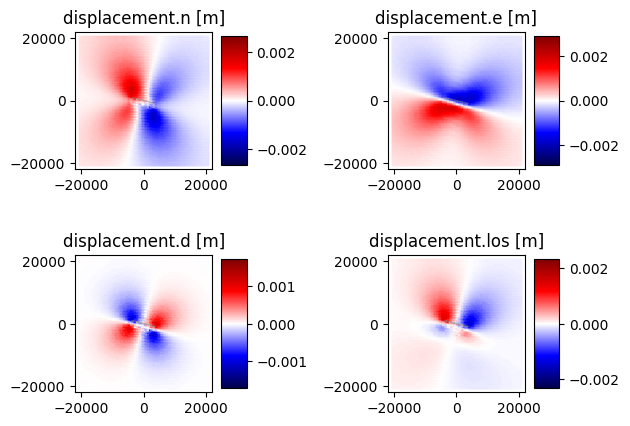

In [24]:
rect_source_mag = gf.RectangularSource(magnitude = 2.8,
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=0., strike=104.,
    slip=0.015)

res_mag = engine.process(rect_source_mag, [satellite_target_base])
                         
plot_static_los_result(res_mag, rect_source = rect_source_mag)

del rect_source_mag, res_mag

#### 2- change strike

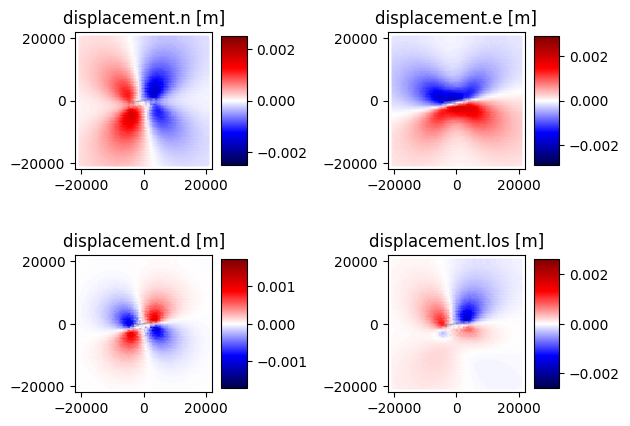

In [25]:
rect_source_str = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=0., strike=80,
    slip=0.015)

res_str = engine.process(rect_source_str, [satellite_target_base])
                         
plot_static_los_result(res_str, rect_source = rect_source_str)

del rect_source_str, res_str

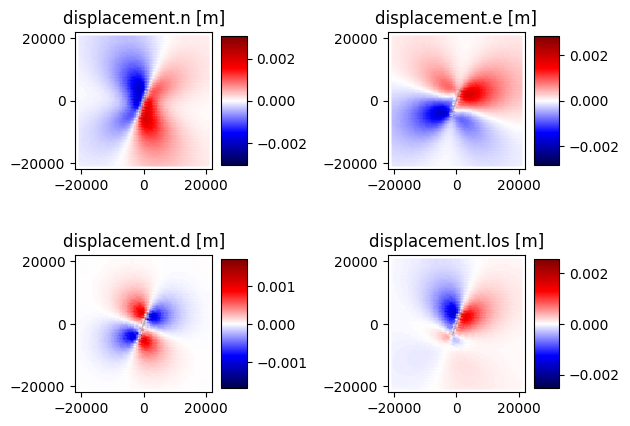

In [26]:
rect_source_str = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=0., strike=20,
    slip=0.015)

res_str = engine.process(rect_source_str, [satellite_target_base])
                         
plot_static_los_result(res_str, rect_source = rect_source_str)

del rect_source_str, res_str

#### 3- change dip:

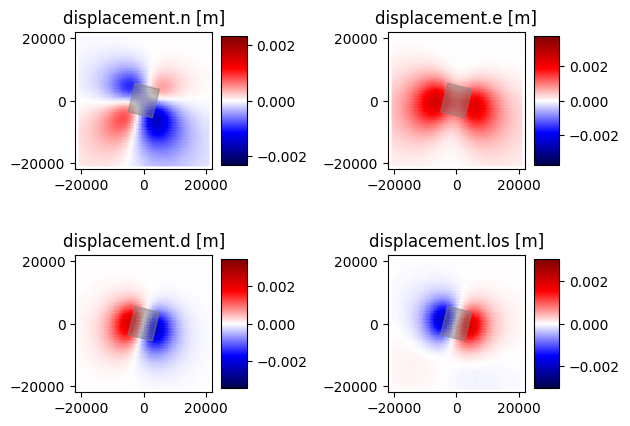

In [27]:
rect_source_dp = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=20., rake=0., strike=104,
    slip=0.015)

res_dp = engine.process(rect_source_dp, [satellite_target_base])
                         
plot_static_los_result(res_dp, rect_source = rect_source_dp)

del rect_source_dp, res_dp

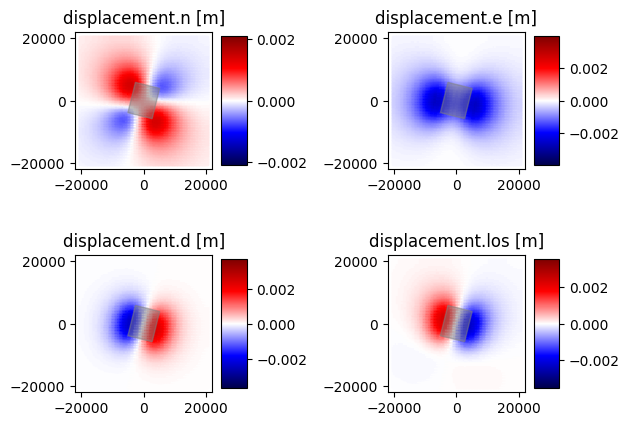

In [28]:
rect_source_dp = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=180., rake=0., strike=104,
    slip=0.015)

res_dp = engine.process(rect_source_dp, [satellite_target_base])
                         
plot_static_los_result(res_dp, rect_source = rect_source_dp)

del rect_source_dp, res_dp

#### 4- change rake

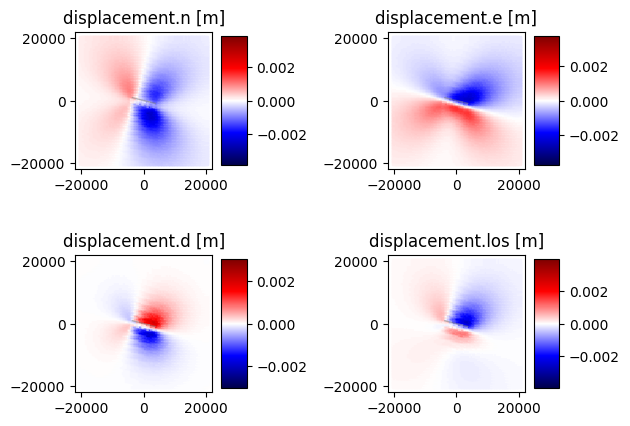

In [29]:
rect_source_rk = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015)

res_rk = engine.process(rect_source_rk, [satellite_target_base])
                         
plot_static_los_result(res_rk, rect_source = rect_source_rk)

del rect_source_rk, res_rk

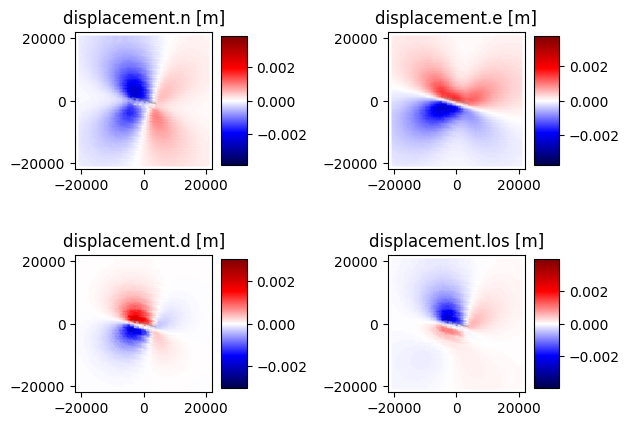

In [30]:
rect_source_rk = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=160., strike=104,
    slip=0.015)

res_rk = engine.process(rect_source_rk, [satellite_target_base])
                         
plot_static_los_result(res_rk, rect_source = rect_source_rk)

del rect_source_rk, res_rk

#### 5- change lenght

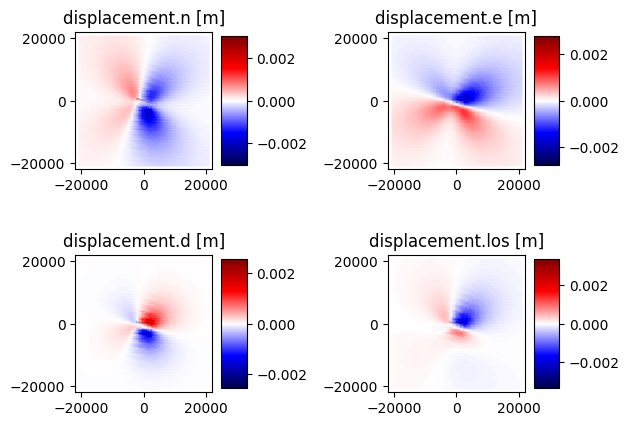

In [31]:
rect_source_l = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=5*km,
    dip=90., rake=20., strike=104,
    slip=0.015)

res_l = engine.process(rect_source_l, [satellite_target_base])
                         
plot_static_los_result(res_l, rect_source = rect_source_l)

del rect_source_l, res_l

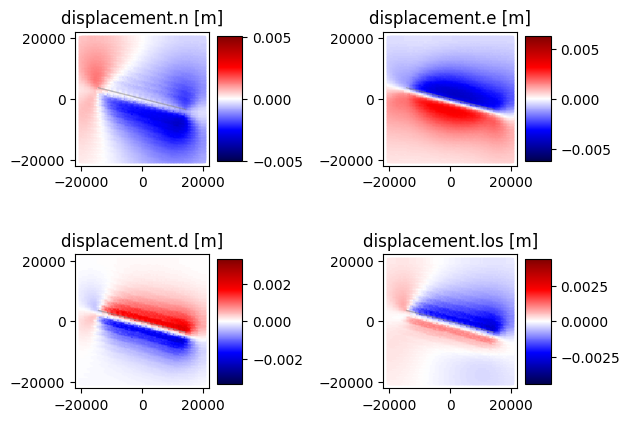

In [32]:
rect_source_l = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=30*km,
    dip=90., rake=20., strike=104,
    slip=0.015)

res_l = engine.process(rect_source_l, [satellite_target_base])
                         
plot_static_los_result(res_l, rect_source = rect_source_l)

del rect_source_l, res_l

#### 6- change width 

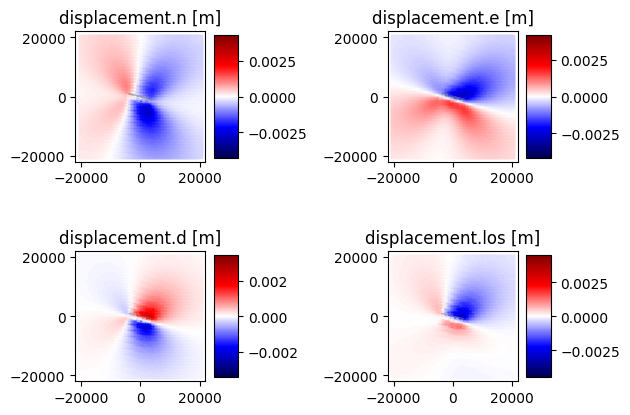

In [33]:
rect_source_w = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=11.5*km,
    width=20*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015)

res_w = engine.process(rect_source_w, [satellite_target_base])
                         
plot_static_los_result(res_w, rect_source = rect_source_w)

del rect_source_w, res_w

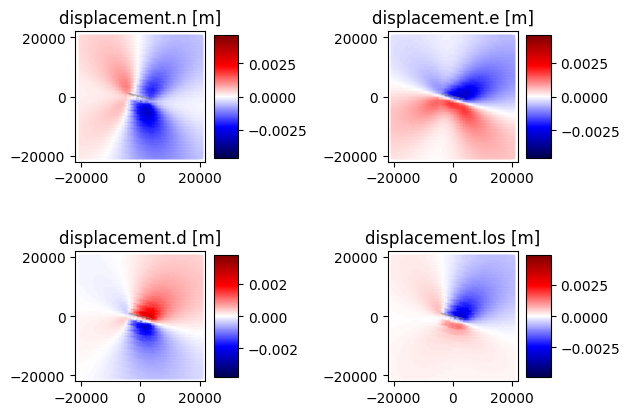

In [34]:
rect_source_w = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=50.5*km,
    width=100*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015)

res_w = engine.process(rect_source_w, [satellite_target_base])
                         
plot_static_los_result(res_w, rect_source = rect_source_w)

del rect_source_w, res_w

#### 7- play with anchor

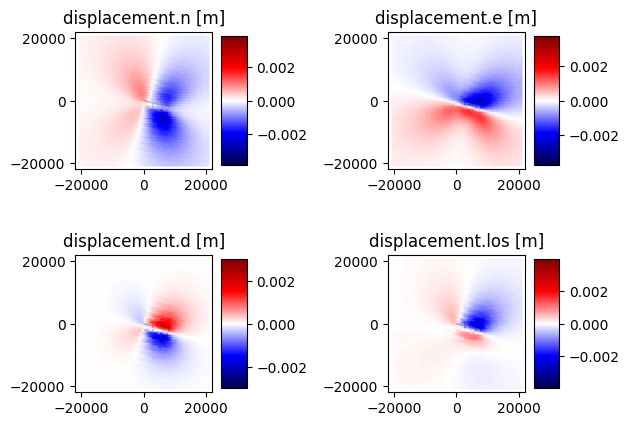

In [35]:
rect_source_a = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, anchor='center_left'  )

res_a = engine.process(rect_source_a, [satellite_target_base])
                         
plot_static_los_result(res_a, rect_source = rect_source_a)

del rect_source_a, res_a

NOT: Bottom_right , bottom_left interpolation hatası veriyor neden ?

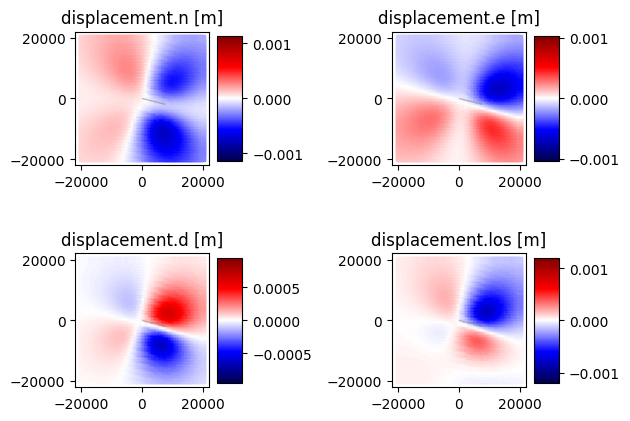

In [36]:

rect_source_a = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, anchor='top_left'  )

res_a = engine.process(rect_source_a, [satellite_target_base])
                         
plot_static_los_result(res_a, rect_source = rect_source_a)

del rect_source_a, res_a

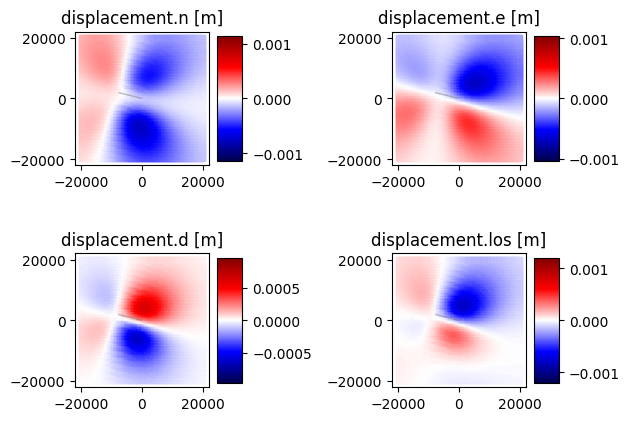

In [37]:

rect_source_a = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, anchor='top_right'  )

res_a = engine.process(rect_source_a, [satellite_target_base])
                         
plot_static_los_result(res_a, rect_source = rect_source_a)

del rect_source_a, res_a

#### 8- change nucleation_x 
SOR Çok BİR ŞEY DEĞİŞTİRMİYOR GİBİ

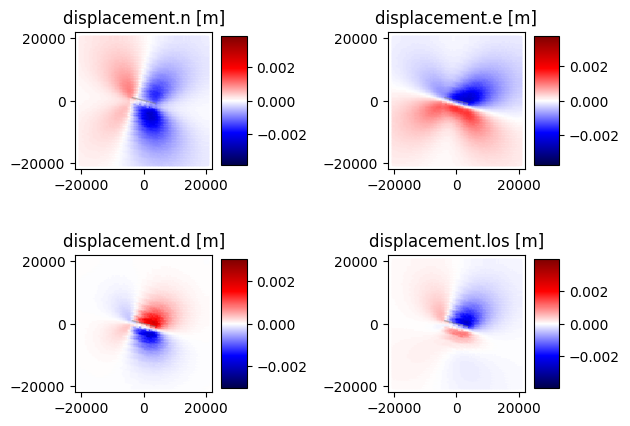

In [38]:
rect_source_nx = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, nucleation_x = -1  )

res_nx = engine.process(rect_source_nx, [satellite_target_base])
                         
plot_static_los_result(res_nx, rect_source = rect_source_nx)

del rect_source_nx, res_nx

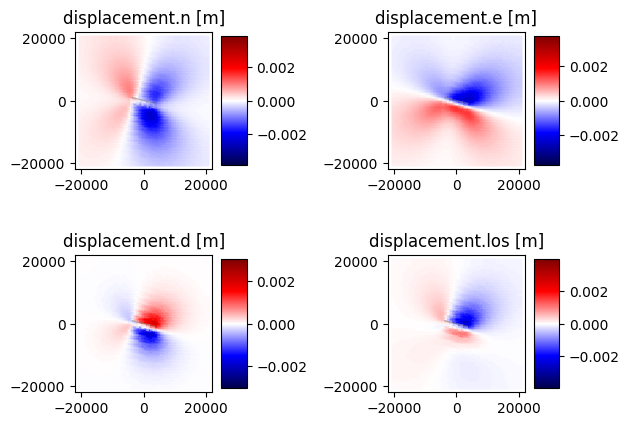

In [39]:
rect_source_nx = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, nucleation_x = 1  )

res_nx = engine.process(rect_source_nx, [satellite_target_base])
                         
plot_static_los_result(res_nx, rect_source = rect_source_nx)

del rect_source_nx, res_nx

#### 9- change nucleation_y:

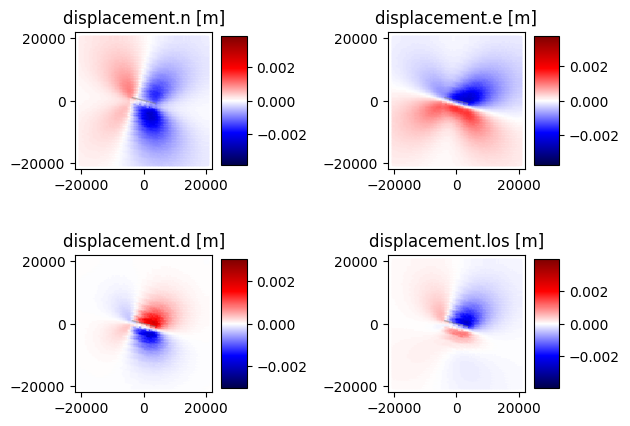

In [40]:
rect_source_ny = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, nucleation_y = 1  )

res_ny = engine.process(rect_source_ny, [satellite_target_base])
                         
plot_static_los_result(res_ny, rect_source = rect_source_ny)

del rect_source_ny, res_ny

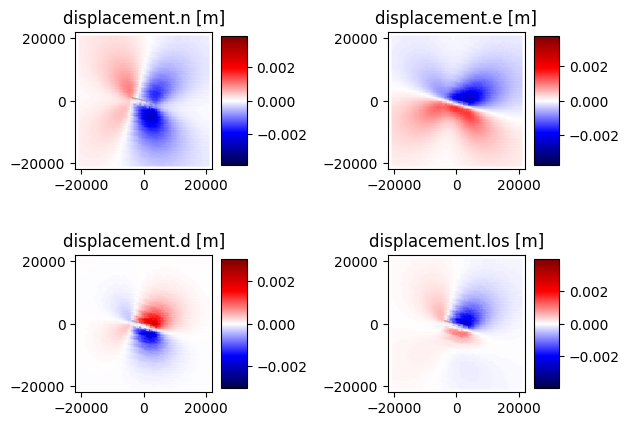

In [41]:
rect_source_ny = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, nucleation_y = -1  )

res_ny = engine.process(rect_source_ny, [satellite_target_base])
                         
plot_static_los_result(res_ny, rect_source = rect_source_ny)

del rect_source_ny, res_ny

#### 10- velocity

SOR: YİNE BİR ŞEY DEĞİŞMİYOR GİBİ ?

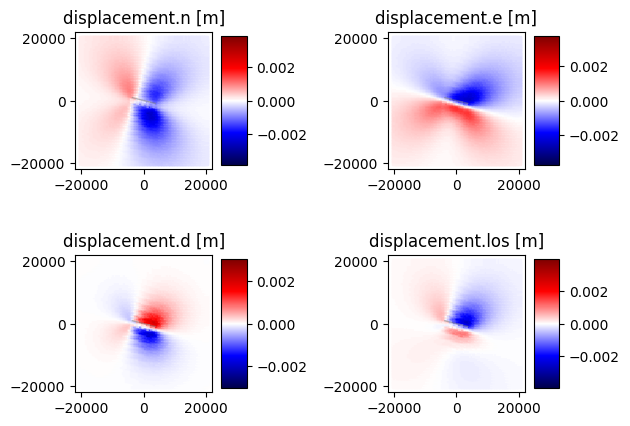

In [42]:
rect_source_v = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, velocity = 10 )

res_v = engine.process(rect_source_v, [satellite_target_base])
                         
plot_static_los_result(res_v, rect_source = rect_source_v)

del rect_source_v, res_v

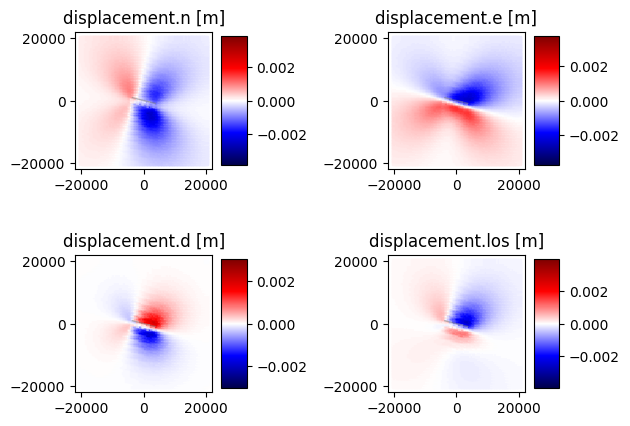

In [43]:
rect_source_v = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, velocity = 35000000 )

res_v = engine.process(rect_source_v, [satellite_target_base])
                         
plot_static_los_result(res_v, rect_source = rect_source_v)

del rect_source_v, res_v

#### 11- opening fraction

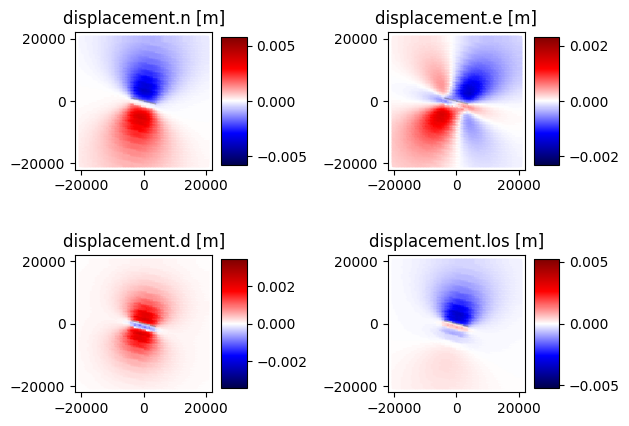

In [44]:
rect_source_of = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, opening_fraction = -1 )

res_of = engine.process(rect_source_of, [satellite_target_base])
                         
plot_static_los_result(res_of, rect_source = rect_source_of)

del rect_source_of, res_of

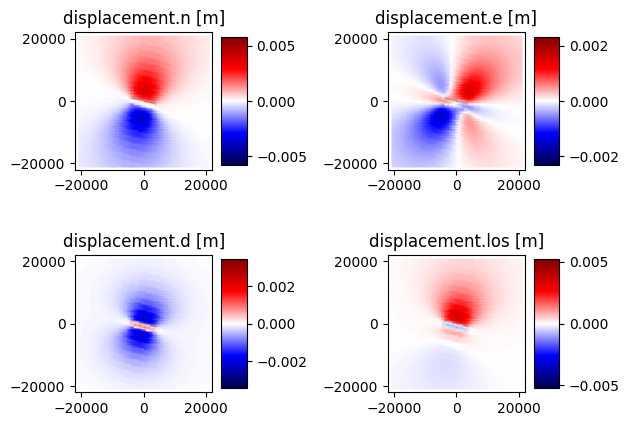

In [45]:
rect_source_of = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0.015, opening_fraction = 1 )

res_of = engine.process(rect_source_of, [satellite_target_base])
                         
plot_static_los_result(res_of, rect_source = rect_source_of)

del rect_source_of, res_of

#### 12- slip

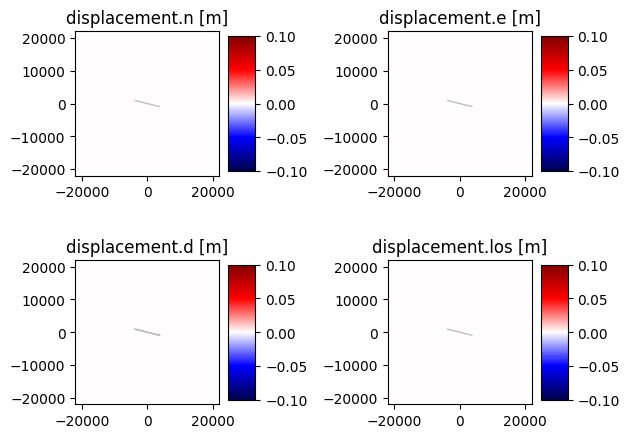

In [46]:
rect_source_s = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=0 )

res_s = engine.process(rect_source_s, [satellite_target_base])
                         
plot_static_los_result(res_s, rect_source = rect_source_s)

del rect_source_s, res_s

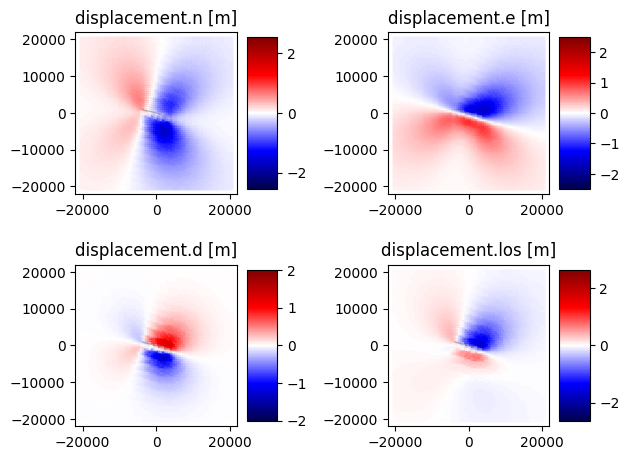

In [47]:
rect_source_s = gf.RectangularSource(
    lat=0., lon=0.,
    north_shift=0., east_shift=0., depth=6.5*km,
    width=10*km, length=8*km,
    dip=90., rake=20., strike=104,
    slip=10 )

res_s = engine.process(rect_source_s, [satellite_target_base])
                         
plot_static_los_result(res_s, rect_source = rect_source_s)

del rect_source_s, res_s

In [53]:
print(rect_source_base)

--- !pf.RectangularSource
depth: 6500.0
time: '1970-01-01 00:00:00'
stf_mode: post
strike: 104.0
dip: 90.0
rake: 0.0
length: 8000.0
width: 10000.0
velocity: 3500.0
slip: 0.015
opening_fraction: 0.0
aggressive_oversampling: false



TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

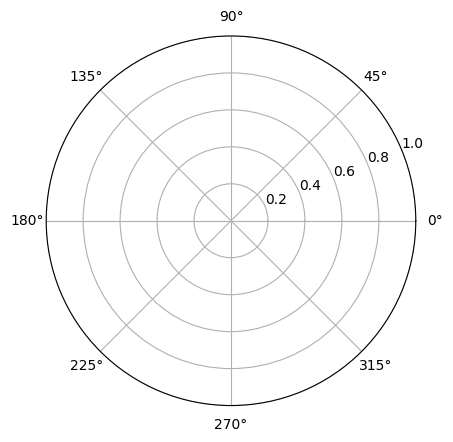

In [51]:
from pyrocko.plot.directivity import plot_directivity
resp = plot_directivity(
    engine, rect_source_base, store_id,
    # axes=axes,
    distance=20*km, #distance in meter 
    dazi=3., #Delta azimuth, bin size [deg]
    component='R', #Forward modelled component, default ``R``
    plot_mt='full', #Plot a centered moment tensor, default ``full``.
    show_phases=True, #Show annotations, default ``True`
    phases={
        'First': 'first{stored:begin}-10%',
        'Last': 'last{stored:end}+20'
    },
    fmax = 5.78704e-06 /2, fmin = 5.78704e-06 /4,
    quantity='displacement', #Seismogram quantity, default ``displacement`
    envelope=False)# if True Plot envelope instead of seismic trace
